In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0, 3, 0.1)
y = np.cos(x)


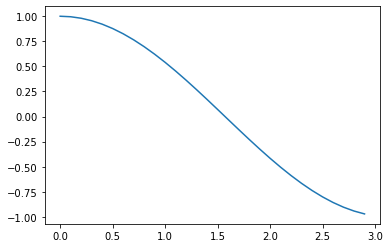

In [3]:
plt.plot(x, y)
plt.show()

In [4]:
input_layer = 1
hidden_layer = 5
output_layer = 1
alpha = 0.01

In [5]:
w1 = np.random.randn(input_layer, hidden_layer)
w2 = np.random.randn(hidden_layer, output_layer)
w2

array([[ 1.16932898],
       [-0.5223867 ],
       [ 1.60902244],
       [ 2.0480985 ],
       [-2.08328781]])

In [6]:
b1 = np.random.randn(1, hidden_layer)
b2 = np.random.randn(1, output_layer)

In [7]:
def find_error(y, y_hat):
    return 0.5 * np.sum((y - y_hat) ** 2)

def forward_propagation(x, w1, w2, b1, b2):
    z1 = np.dot(x, w1) + b1
    a1 = 1/(1+np.exp(-z1))
    z2 = np.dot(a1, w2) + b2
    a2 = z2
    return a1, a2

def backward_propagation(x, y, w1, w2, b1, b2):
    a1, a2 = forward_propagation(x, w1, w2, b1, b2)
    delta2 = a2 - y
    dw2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis = 0, keepdims = True)
    delta1 = np.dot(delta2, w2.T)*a1 *(1-a1)
    dw1 = np.dot(x.T, delta1)
    db1 = np.sum(delta1, axis = 0, keepdims = True)
    return dw1, dw2, db1, db2

In [8]:
error_total = []
while True:
    dw1_sum = 0
    dw2_sum = 0
    db1_sum = 0
    db2_sum = 0
    for i in range(len(x)):
        dw1_sum += backward_propagation(x[i], y[i], w1, w2, b1, b2)[0]
        dw2_sum += backward_propagation(x[i], y[i], w1, w2, b1, b2)[1]
        db1_sum += backward_propagation(x[i], y[i], w1, w2, b1, b2)[2]
        db2_sum += backward_propagation(x[i], y[i], w1, w2, b1, b2)[3]
    dw1 = dw1_sum / len(x)
    dw2 = dw2_sum / len(x)
    db1 = db1_sum / len(x)
    db2 = db2_sum / len(x)
    w1 -= alpha * dw1
    w2 -= alpha * dw2
    b1 -= alpha * db1
    b2 -= alpha * db2
    y_hat = forward_propagation(x, w1, w2, b1, b2)[1]
    error = find_error(y, y_hat)
    error_total.append(error)
    if error<0.001:
        break

ValueError: shapes (30,) and (1,5) not aligned: 30 (dim 0) != 1 (dim 0)